## Vamos nos conectar:
[Linkedin](https://www.linkedin.com/in/jeduardosleite/)
---

---
<p align="center">
  <img src="./capa.png" alt="Classificação do BMI" width="500"/>
</p>

# Objetivo

Predizer o valor do contrato com base em variáveis socioeconômicas e comportamentais utilizando a regressão linear. 

```Regressão linear``` é uma técnica estatística usada para modelar e prever a relação entre uma variável dependente (Y) e uma ou mais variáveis independentes (X), assumindo que essa relação pode ser representada por uma linha reta.

# Etapas

### 1) Entendendo o problema
Para este tipo de problema, utilizarei o **aprendizado supervisionado**, aquele em que o modelo aprende a partir de ```dados rotulados```. Existe uma variável alto(*target*) que queremos prever, neste caso, é a ```charges```. Para explicar essa variável, temos: idade, sexo, IMC, número de filhos, região e tabagismo.

Para as **métricas de avaliação**, usarei as seguintes:

- **MAE** (*Mean Absolute Error*): mede o erro médio absoluto entre os valores previstos e reais. Indica, em média, quanto o modelo erra em unidades reais (ex.: reais). Quanto menor o MAE, menor é o erro médio das previsões.
    
- **RMSE** (*Root Mean Squared Error*): mede a raiz do erro quadrático médio, penalizando mais fortemente erros grandes. É indicada quando erros elevados têm maior impacto. Quanto menor o RMSE, melhor o modelo em evitar grandes erros.
    
- **R²** (*Coeficiente de Determinação*): indica a proporção da variabilidade dos dados explicada pelo modelo. Varia geralmente entre 0 e 1 e é útil para comparar o desempenho geral entre modelos.


O ```MAE``` foi adotado como métrica principal por indicar diretamente o erro médio na previsão do valor do plano, alinhando-se ao objetivo do modelo de estimar o custo do contrato de forma clara e interpretável.


### 2) Dataset

Este conjunto de dados contém informações sobre a relação entre atributos pessoais (idade, sexo, IMC, tamanho da família, tabagismo), fatores geográficos e seu impacto nos custos do seguro saúde.

| Variável   | Descrição                                                                 |
|------------|---------------------------------------------------------------------------|
| age      | A idade da pessoa segurada.                                                |
| sex       | Gênero (masculino ou feminino) do segurado.                                |
| bmi        | Índice de Massa Corporal, medida da gordura corporal baseada em peso e altura. |
| children     | Número de dependentes abrangidos pelo seguro.                              |
| smoker    | Indica se o segurado é fumante (sim ou não).                               |
| region     | Área geográfica de cobertura do seguro.                                   |
| charges   | Custos do seguro de saúde incorridos pela pessoa segurada.                |

Para facilitar a interpretação do *BMI* (Índice de Massa Corporal), serão aplicados rótulos que indicam a faixa em que cada valor se enquadra. Inicialmente, essa categorização será utilizada apenas para fins de análise e explicação do negócio, sem a decisão prévia de incluí-la no treinamento do modelo. Ao longo do desenvolvimento do projeto, será avaliada a real necessidade dessa variável com base em seu impacto no desempenho do modelo.

| Faixa de BMI (kg/m²) | Descrição         |
|----------------------|-------------------|
|< 18,5                | Magreza           |
| 18,5 – 24,9          | Normal            |
| 25,0 – 29,9          | Sobrepeso         |
| 30,0 – 39,9          | Obesidade         |
| ≥ 40,0               | Obesidade grave   |

fonte: https://abran.org.br/calculadoras/imc

### 3) EDA (Análise Explanatória de Dados)
1) Verificar os valores nulos, faltantes e a dimensão do dataset;
2) Estatística descritiva (média, mediana, dispersão, quartis etc);
3) Análise de correlação entre as variáveis;
4) Identificação outliers.

### 4) Pré-processamento dos dados
Nesta etapa, será realizada a análise e o tratamento de *outliers*, caso necessário. Em seguida, será feita uma avaliação mais aprofundada das variáveis, com o objetivo de definir quais serão utilizadas no modelo, bem como identificar a necessidade de aplicação de técnicas de *feature engineering* e quais delas serão mais adequadas.

Ao final, será realizada a sepação em treino e teste.

### 5) Modelagem
Com a base separada, está na hora de treinar e comparar diferentes modelos de regressão linear para identificar qual apresenta o melhor desempenho na previsão do valor do plano, considerando erro, estabilidade e capacidade de generalização.

### 6) Avaliação
Após o treinamento, os modelos serão avaliados para verificar qual generaliza melhor para os dados não vistos. Lembrando que a métrica principal será a ```MAE```, porém o *R²* e o *RMSE* serão avaliados também.

### 7) Interpretação dos resultados
Nesta etapa, serão apresentados os resultados obtidos pelo modelo, incluindo a análise da importância das variáveis e o impacto de fatores socioeconômicos e comportamentais. A partir dessas análises, serão extraídos insights relevantes para o negócio.

Além disso, será realizada uma síntese crítica dos resultados, avaliando o desempenho do modelo, suas limitações e possíveis oportunidades de melhoria.

### 8) Aprendizado
Nesta etapa, serão descritos os principais desafios enfrentados ao longo do projeto, bem como as soluções adotadas para superá-los, destacando os aprendizados técnicos e analíticos adquiridos durante o desenvolvimento.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import watermark
import statsmodels.api as sm

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Versão dos pacotes usados no projeto

In [2]:
%reload_ext watermark
%watermark  --iversion -d -a "José Eduardo de Souza Leite - Graduando em Ciência de Dados"

Author: José Eduardo de Souza Leite - Graduando em Ciência de Dados

Date: 2025-12-30

matplotlib : 3.7.5
numpy      : 1.26.4
pandas     : 2.3.3
seaborn    : 0.13.2
sklearn    : 1.4.2
statsmodels: 0.14.5
watermark  : 2.6.0



## Entendendo o Dataset

Foi aplicada a técnica de **bins** para criar uma nova variável categórica a partir do *BMI* (Índice de Massa Corporal). Essa abordagem permite agrupar os valores contínuos de *BMI* em faixas predefinidas, facilitando a interpretação dos dados sob a perspectiva do negócio.

A função ```pd.cut``` foi utilizada para realizar essa categorização, atribuindo a cada observação uma categoria correspondente ao intervalo definido na variável **bins**.

In [3]:
df = pd.read_csv('.\insurance.csv')   # salvando o arquivo .csv num dataframe

################################################

# Criei as bins com as categorias do IMC

bins = [0, 18.5, 25, 30, 39, float('inf')]
labels = [
    'Magreza',
    'Normal',
    'Sobrepeso',
    'Obesidade',
    'Obesidade Grave'
]

df['bmi_categoria'] = pd.cut(
    df['bmi'],
    bins=bins,
    labels=labels,
    right=False
)

df

,age,sex,bmi,children,smoker,region,charges,bmi_categoria
0,19,female,27.900,0,yes,southwest,16884.92400,Sobrepeso
1,18,male,33.770,1,no,southeast,1725.55230,Obesidade
2,28,male,33.000,3,no,southeast,4449.46200,Obesidade
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Sobrepeso
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obesidade
1334,18,female,31.920,0,no,northeast,2205.98080,Obesidade
1335,18,female,36.850,0,no,southeast,1629.83350,Obesidade
1336,21,female,25.800,0,no,southwest,2007.94500,Sobrepeso


### Observações

- Não há valores nulos;
- A princípio, temos duas variáveis binárias: ```sex``` e ```smoker```;
- O conjunto de dados possui **1338 linhas** e **8 colunas**.

In [4]:
df.nunique()

age                47
sex                 2
bmi               548
children            6
smoker              2
region              4
charges          1337
bmi_categoria       5
dtype: int64

In [5]:
# Valores nulos

df.isnull().sum()

age              0
sex              0
bmi              0
children         0
smoker           0
region           0
charges          0
bmi_categoria    0
dtype: int64

In [6]:
# Dimensão do dataset

print(f'O conjunto de dados possui {df.shape[0]} linhas e {df.shape[1]} colunas.')
print(df.dtypes)

O conjunto de dados possui 1338 linhas e 8 colunas.
age                 int64
sex                object
bmi               float64
children            int64
smoker             object
region             object
charges           float64
bmi_categoria    category
dtype: object


# Análise descritiva

## Variáveis Quantitativas


- ```Contagem``` (count)
- ```Média``` (mean)
- ```Desvio padrão``` (std) - *dispersão dos dados*
- ```Mínimo``` (min)
- ```Quartis``` (25%, 50%, 75%)
- ```Máximo``` (max)

### age
Idade média de ```39 anos```, com valores mínimos de 18 e máximo de 64.

### bmi
A média e a mediana do IMC indicam tendência à obesidade leve na população

### children
25% dos indivíduos não possuem filhos, enquanto o valor máximo observado é 5 filhos.

### charges
Variável com maior ```dispersão dos dados``` com possível presença de valores extremos, devendo ser investigada com técnicas de detecção de outliers.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Variáveis Qualitativas

### sex
A variável possui **duas categorias**, sendo **male** a mais frequente, com **676 registros**, indicando leve predominância do sexo masculino na base de dados.

### smoker
Variável binária com duas categorias. A maioria dos indivíduos **não é fumante**, totalizando **1.064 registros**, o que representa a maior parte da amostra.

### region
A variável apresenta **quatro categorias distintas**. A região **southeast** é a mais frequente, com **364 ocorrências**, indicando maior concentração de segurados nessa região.


In [8]:
df.describe(include=['object']).T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


# Gráficos para análise

In [9]:
def hist_box(df, x, titulo_hist, titulo_box):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(df[x], kde=True, bins=20, ax=axes[0])
    axes[0].set_title(titulo_hist)

    axes[1].boxplot(df[x], vert=False)
    axes[1].set_title(titulo_box)

    plt.tight_layout()
    plt.show()

def plot_bar(df, x, titulo_grafico):
    counts = df[x].value_counts().sort_index()

    plt.figure(figsize=(6, 4))
    plt.bar(counts.index, counts.values)
    plt.title(titulo_grafico)
    plt.xlabel(x)
    plt.ylabel('Frequência')
    plt.show()

### Observações sobre os gráficos (histograma e boxplot)

- A ```distribuição da idade```, no geral, traz uma harmoniosidade, exceto pelos valores próximos aos 20 anos, que apresenta um valor muito acima da média;
- A ```distribuição da BMI``` demonstra possíveis **outliers** no final da calda. Estes serão investigados posteriormente;
- A ```distribuição da Charges``` mostra valores extremamente altos, como foi visto anteriormente na análise descritiva. Também será investigada posteriormente.

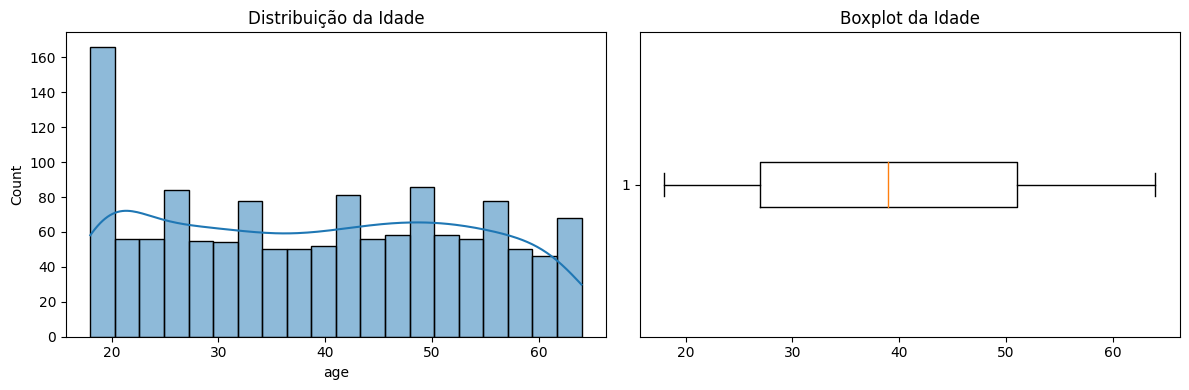

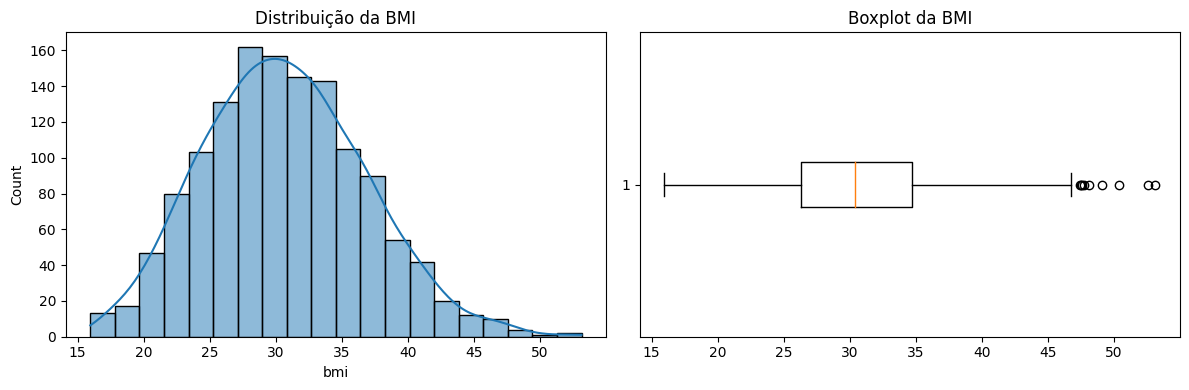

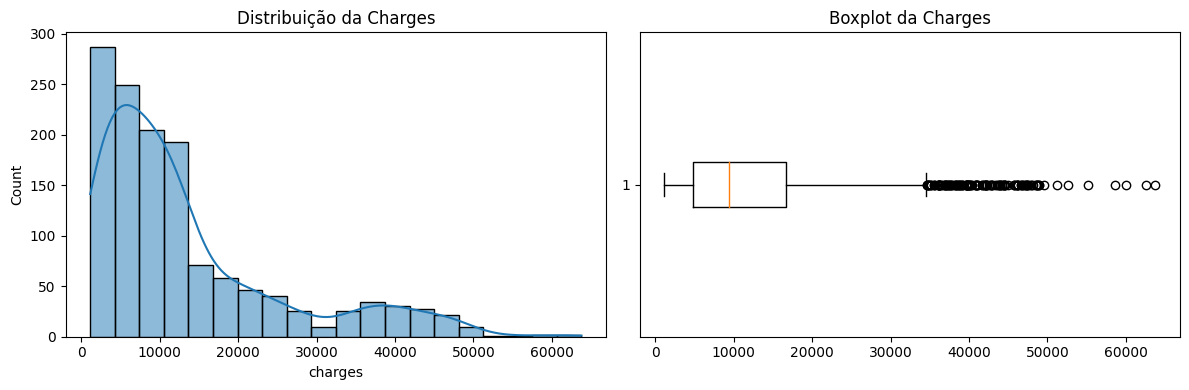

In [10]:
hist_box(df, 'age', 'Distribuição da Idade', 'Boxplot da Idade')
hist_box(df, 'bmi', 'Distribuição da BMI', 'Boxplot da BMI')
hist_box(df, 'charges', 'Distribuição da Charges', 'Boxplot da Charges')

### Observações sobre os gráficos (barras)

- O ```número de filhos``` apresenta forte concentração em valores baixos, com a maioria dos registros entre 0 e 2 filhos. Valores acima de 3 filhos são pouco representativos, o que pode impactar a capacidade do modelo de generalizar para esses casos. Tentarei agrupar estas categorias raras;
- A distribuição de ```Masculino x Feminino``` está simétrica, aparentemente não há problemas;
- A ```Relação de fumantes``` apresenta um desbalanceamento moderado, com predominância de não fumantes. Apesar disso, trata-se de uma variável altamente relevante, pois clientes fumantes estão associados a valores significativamente mais altos de custo do plano, impactando diretamente o desempenho do modelo. Farei alguns testes para ver como esta variável se comporta, por exemplo, mantendo-a como está ou avaliar separadamente.

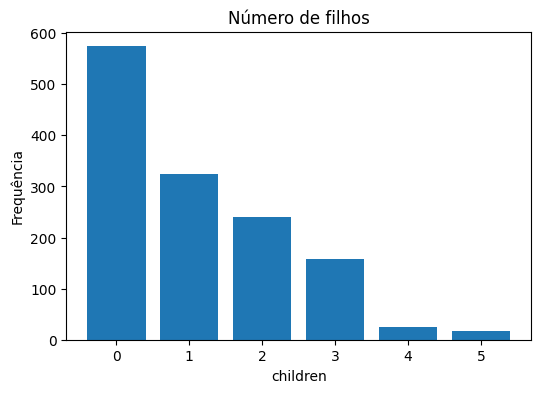

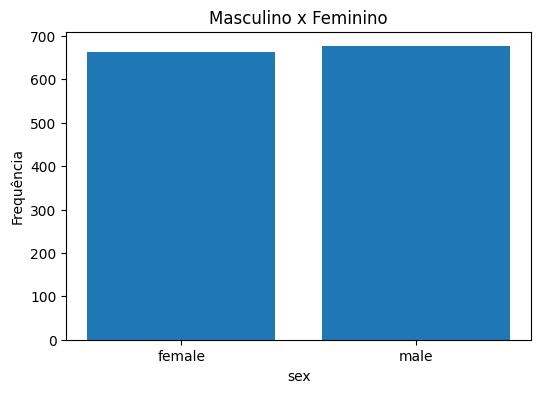

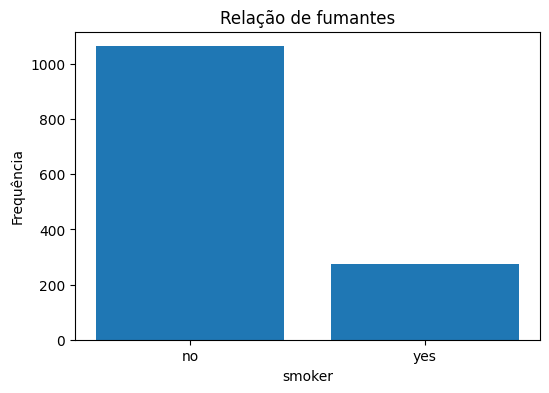

In [11]:
plot_bar(df, 'children', 'Número de filhos')
plot_bar(df, 'sex', 'Masculino x Feminino')
plot_bar(df, 'smoker', 'Relação de fumantes')

# Comparativo entre as variáveis

Pensando no objetivo do projeto, vou comparar algumas variáveis para entender sua relação com ```charges```.

In [12]:
def scat_plot(df,x,y,hue):
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x=x, y=y, hue=hue)
    plt.title(f"Relação entre {x} x Custo do seguro com {hue}")
    plt.xlabel(x)
    plt.ylabel("Custo do Seguro")
    plt.show()

### Observação sobre os gráficos (Scatterplot)

- A variável ```smoker``` traz informações super relevantes quando comparadas com as demais variáveis. Fica evidente que o usuário fumante eleva o custo do plano de saúde, como podemos ver nos gráficos **Relação entre bmi x Custo do seguro com smoker** e **Relação entre age x Custo do seguro com smoker**.
- A ```age``` traz a seguinte interpretação: quanto mais velho, maior o custo.
- As variáveis ```sex```, ```region``` e ```children``` não trazem muitas informações relevantes, estão equilibrados na distribuição.

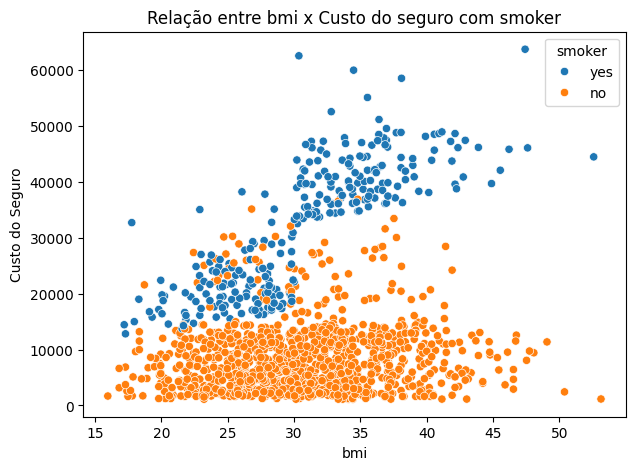

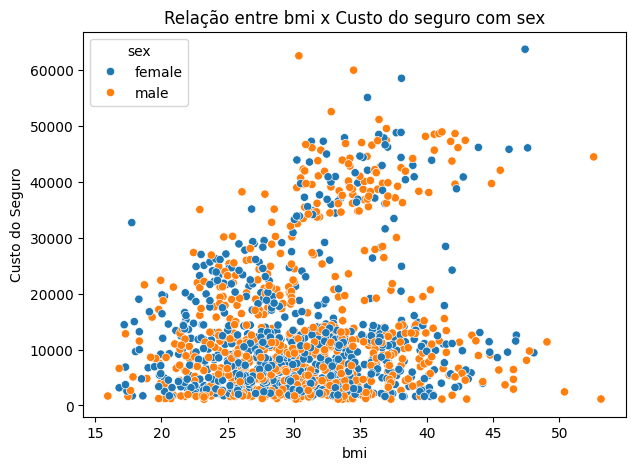

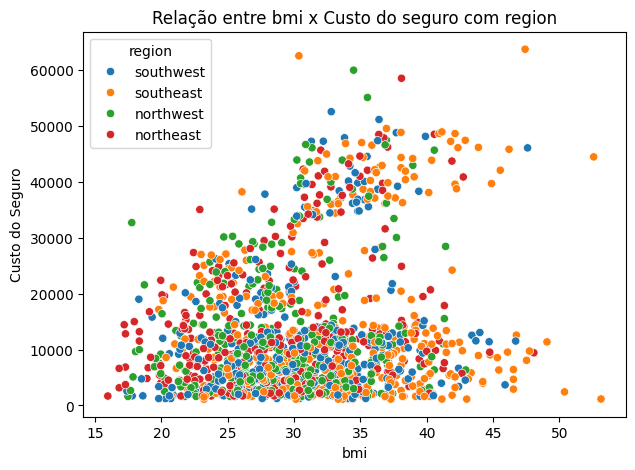

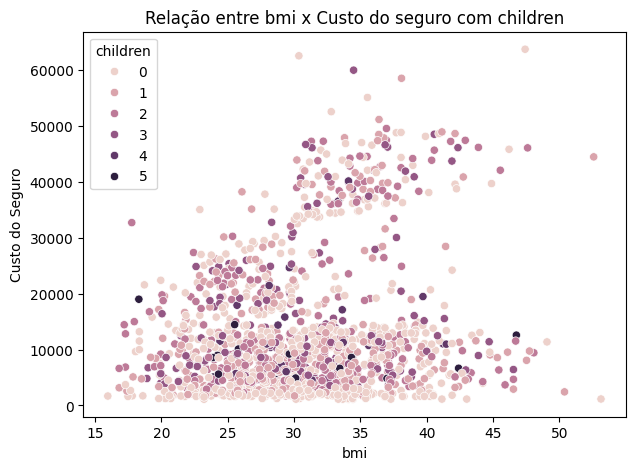

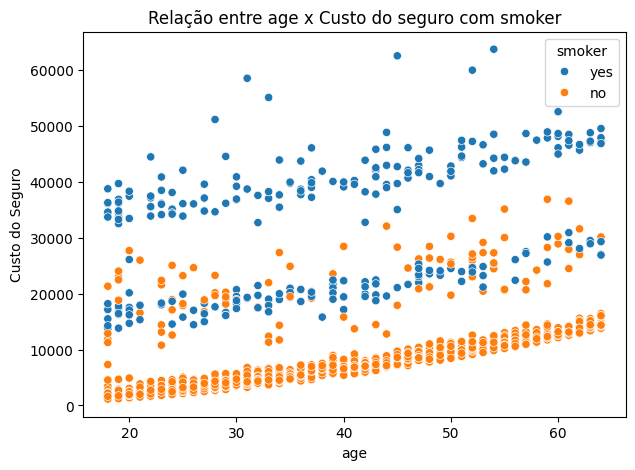

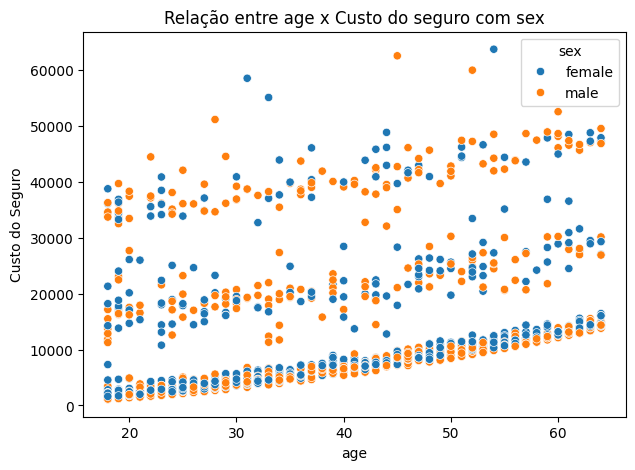

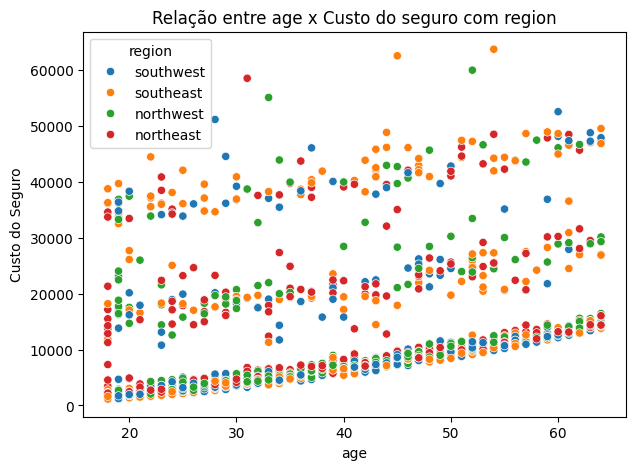

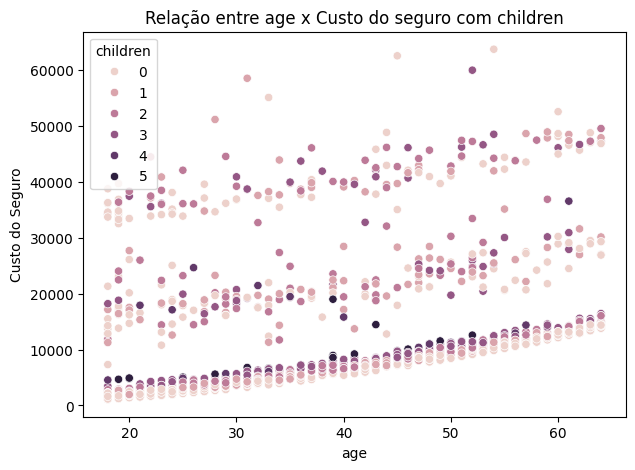

In [13]:
scat_plot(df, 'bmi','charges','smoker')
scat_plot(df, 'bmi','charges','sex')
scat_plot(df, 'bmi','charges','region')
scat_plot(df, 'bmi','charges','children')

scat_plot(df, 'age','charges','smoker')
scat_plot(df, 'age','charges','sex')
scat_plot(df, 'age','charges','region')
scat_plot(df, 'age','charges','children')

# Correlação

Numa primeira análise, sem qualquer tratamento dos dados, a análise de correlação mostrou que o fator mais associado ao custo do seguro é o hábito de fumar (```smoker```), apresentando correlação forte e positiva com a variável ```charges```.

```Age``` e ```BMI``` apresentam correlação moderada, enquanto ```children```, ```sex``` e ```region``` têm impacto limitado.

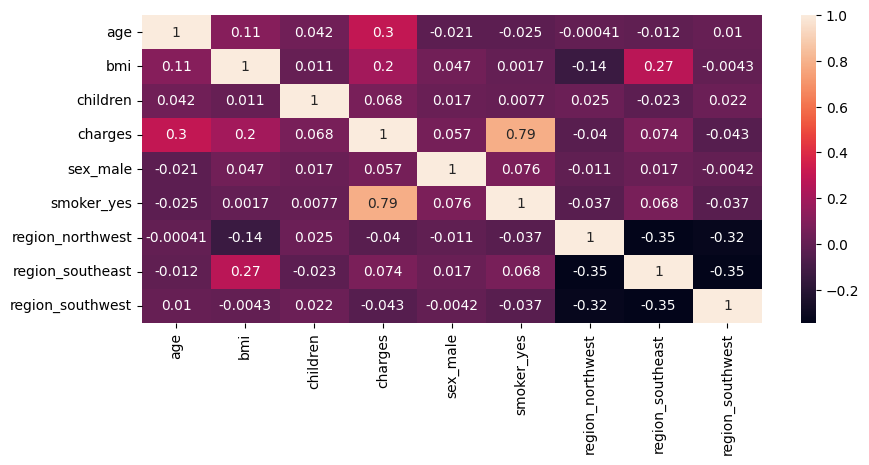

In [14]:
df_corr = df.drop(columns=['bmi_categoria'])
df_corr = pd.get_dummies(df_corr, drop_first=True)
df_corr = df_corr.astype(int)

corr = df_corr.select_dtypes(include='number').corr()

plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True)
plt.show()

# VIF

O ```VIF``` (Variance Inflation Factor) é uma métrica usada para medir a **multicolinearidade** em modelos de regressão. Ela indica o quanto a variância do coeficiente de uma variável é inflada devido à correlação dela com as demais variáveis explicativas.

| Valor do VIF | Interpretação          |
| ------------ | ---------------------- |
| ≈ 1          | Sem multicolinearidade |
| 1 – 5        | Baixa, aceitável       |
| 5 – 10       | Atenção                |
| ≥ 10         | Problema relevante     |


A análise de multicolinearidade por meio do *VIF* indica valores elevados para a variável ```bmi```, sugerindo compartilhamento de informação com outras variáveis explicativas. Ao mesmo tempo, esse valor indica que ela é relevante.

A variável ```age``` apresenta VIF moderadamente alto, enquanto as demais não indicam problemas de multicolinearidades.

A partir dessas informações, começarei o tratamento dos dados.

In [15]:
y = df_corr['charges']
X = df_corr.drop(columns=['charges'])

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif.sort_values(by='VIF', ascending=False)

,feature,VIF
1,bmi,11.231286
0,age,7.635389
6,region_southeast,2.266486
3,sex_male,2.002017
7,region_southwest,1.959754
5,region_northwest,1.886371
2,children,1.808632
4,smoker_yes,1.260650


# Pré processamento dos dados

## Outliers

São valores extremos em um conjunto de dados, que fogem muito do padrão da maioria das observações. Esta é uma fase importantíssima do projeto, pois a **regressão linear** é sensível aos *outliers*.

Como visto anteriormente, existem duas variáveis que, claramente, apresentam outliers: ```bmi``` e ```charges```.

| Variável  | Count | Mean        | Std         | Min       | 25%        | 50%        | 75%        | Max        |
|----------|-------|-------------|-------------|-----------|------------|------------|------------|------------|
| age      | 1338  | 39.21       | 14.05       | 18.00     | 27.00      | 39.00      | 51.00      | 64.00      |
| bmi      | 1338  | 30.66       | 6.10        | 15.96     | 26.30      | 30.40      | 34.69      | 53.13      |
| children | 1338  | 1.09        | 1.21        | 0.00      | 0.00       | 1.00       | 2.00       | 5.00       |
| charges  | 1338  | 13270.42    | 12110.01    | 1121.87   | 4740.29    | 9382.03    | 16639.91   | 63770.43   |

O que farei agora:
- Avaliarei se os erros são casos reais;
- Aplicarei técnicas para amenizar esses valores;
- Em último caso, irei remover.

## Novo dataframe

Criarei um novo dataframe para iniciar o processamento de dados. Excluirei as variáveis que não apresentaram relevância nas análises anteriores (gráficos e VIF).

- ```region```
- ```bmi_categorias``` - usada apenas para o entendimento do negócio
- ```bmi``` e ```children``` serão categorizadas

### bmi

A variável ```bmi``` foi categorizada em cinco faixas clínicas e convertidas para formato númerico, para facilitar a interpretação e reduzir o impacto de valores extremos.

| Faixa de BMI (kg/m²) | Descrição         | Categoria |
|----------------------|-------------------|-----------|
|< 18,5                | Magreza           |1          |
| 18,5 – 24,9          | Normal            |2          |
| 25,0 – 29,9          | Sobrepeso         |3          |
| 30,0 – 39,9          | Obesidade         |4          |
| ≥ 40,0               | Obesidade grave   |5          |

### children

A categorização dessa variável foi adotada para reduzir a influência de categorias com baixa frequência (4 e 5 filhos), melhorar a interpretação dos resultados e diminuir o risco de *overfitting*, caracterizado pelo sobreajuste do modelo aos dados de treino, quando ruídos e padrões específicos são aprendidos em excesso, comprometendo a capacidade de generalização para novos dados.

In [16]:
df['children'].value_counts()

# Juntando as categorias 3,4 e 5 filhos, teremos um valor mais significativo para o aprendizado do modelo.

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [17]:
# Novo df

new_df = df.copy()   # cópia de segurança do df original
new_df = new_df.drop(columns=['bmi_categoria',
                             'region'])

In [18]:
# Categorização do children

bins = [-1, 0, 2, df['children'].max()]
labels = ['0', '1-2', '3+']

new_df['children'] = pd.cut(
        new_df['children'],
        bins=bins,
        labels=labels
)

In [19]:
# Categorização do bmi

bins = [-np.inf, 18.5, 24.9, 29.9, 39.9, np.inf]
labels = [1, 2, 3, 4, 5]

new_df['bmi_cat'] = pd.cut(
    new_df['bmi'],
    bins=bins,
    labels=labels,
    right=True
).astype(int)

new_df['bmi_cat'] = new_df['bmi_cat'].astype(int)  # convertendo para int

new_df.head()

,age,sex,bmi,children,smoker,charges,bmi_cat
0,19,female,27.900,0,yes,16884.92400,3
1,18,male,33.770,1-2,no,1725.55230,4
2,28,male,33.000,3+,no,4449.46200,4
3,33,male,22.705,0,no,21984.47061,2
4,32,male,28.880,0,no,3866.85520,3


## Tratamento da Charges

Considerando a forte assimetria e a presença de valores extremos nesta variável, optei por aplicar uma ```transformação logarítimica``` com o objetivo de reduzir a influência dos *outliers*. Com isso, trarei:
- compressão dos valores altos;
- redução da assimetria;
- aproximação de uma distribuição próximo do real.

Essa transformação **não** vai alterar a ordem dos dados, ou seja, quem tinha custo maior continua tendo custo maior. O que o *log* faz é comprimir a escala, especialmente os *outliers*.

---

A **análise descritiva** justifica a aplicação da transformação logarítmica. Os quartis ficaram mais distribuídos, ocasionando na diminuição do ```std```. Este é o comportamento esperado quando aplicamos o *log*.

In [20]:
new_df['charges_log'] = np.log1p(new_df['charges'])

new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.0,30.663397,6.098187,15.960000,26.296250,30.400000,34.693750,53.130000
charges,1338.0,13270.422265,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010
bmi_cat,1338.0,3.408072,0.897596,1.000000,3.000000,4.000000,4.000000,5.000000
charges_log,1338.0,9.098828,0.919379,7.023647,8.464064,9.146658,9.719618,11.063061


### Relação com a variável alvo (`charges_log`)

A variável **idade (`age`)** apresentou uma correlação moderada com o logaritmo dos custos médicos (`charges_log`), com coeficiente em torno de 0,53. Esse resultado indica que o aumento da idade está associado a um crescimento percentual nos custos, e que essa relação tornou-se mais evidente após a aplicação da transformação logarítmica, sugerindo uma melhor adequação à suposição de linearidade do modelo.

O **BMI** apresentou correlação fraca com `charges_log` (0,13), indicando que, isoladamente, essa variável explica apenas uma pequena parcela da variação dos custos médicos. Esse comportamento sugere que o impacto do BMI pode ser não linear ou depender da interação com outras variáveis, como tabagismo ou idade.

A versão **categorizada do BMI (`bmi_cat`)** apresentou correlação muito próxima à do BMI contínuo em relação à variável alvo (0,12). Isso demonstra que a discretização do BMI em faixas preservou a informação essencial contida na variável original, ao mesmo tempo em que melhora a interpretação dos efeitos no modelo.

### Relação entre `charges` e `charges_log`

A correlação elevada entre `charges` e `charges_log` (0,89) era esperada, uma vez que a transformação logarítmica preserva a ordem dos valores. Esse resultado confirma que o uso do log reduz a assimetria e a influência de valores extremos sem comprometer a estrutura informacional da variável original, favorecendo a estabilidade do modelo.

### Relação entre `bmi` e `bmi_cat`

Observa-se uma correlação muito alta entre `bmi` e `bmi_cat` (0,92), o que indica que a variável categorizada representa fielmente o comportamento do BMI contínuo. No entanto, essa forte associação caracteriza redundância entre as duas variáveis, tornando inadequado o uso simultâneo de ambas em um modelo de regressão linear, devido ao risco de multicolinearidade.

---

### Implicações para o modelo

Os resultados indicam que a **idade** se destaca como um dos principais preditores dos custos médicos, especialmente após a transformação logarítmica da variável alvo. O **BMI**, por sua vez, apresenta impacto mais limitado quando analisado isoladamente, sendo a sua versão categorizada uma alternativa viável para melhorar a interpretação sem perda significativa de informação.

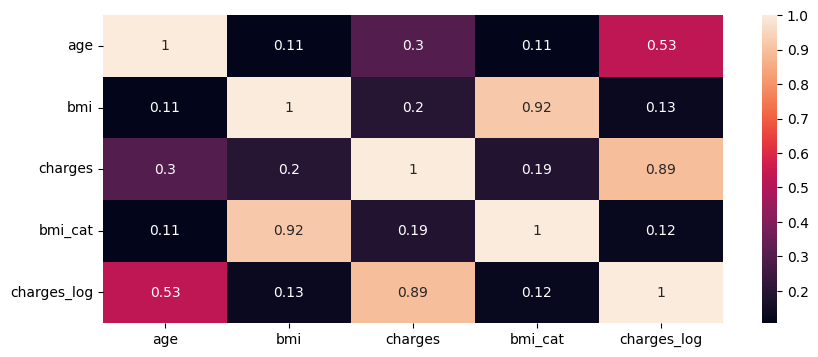

In [21]:
new_corr = new_df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,4))
sns.heatmap(new_corr, annot=True)
plt.show()

## Análise do gráfico

# `charges` (sem log)

- A distribuição apresenta **forte assimetria à direita**.
- A maior parte dos valores está concentrada nas faixas mais baixas.
- Existem **poucos valores extremamente altos**, que dominam visualmente o gráfico.
- Essa concentração dificulta a identificação de padrões e a comparação entre grupos.

**Interpretação:** os valores extremos exercem grande influência, mascarando o comportamento da maioria da amostra.

---

## `charges_log` (com log)

- A distribuição torna-se **mais equilibrada e próxima de uma forma simétrica**.
- A frequência dos valores se distribui de maneira mais homogênea ao longo das faixas.
- A influência de valores extremos é significativamente reduzida.
- O gráfico passa a representar melhor o comportamento geral dos dados.

**Interpretação:** a transformação logarítmica comprime os valores elevados e expande os valores menores, facilitando a análise visual.

---

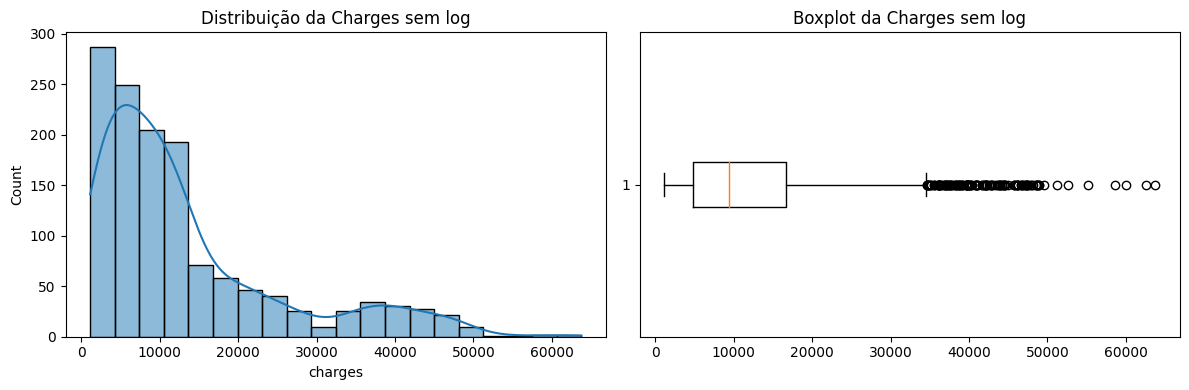

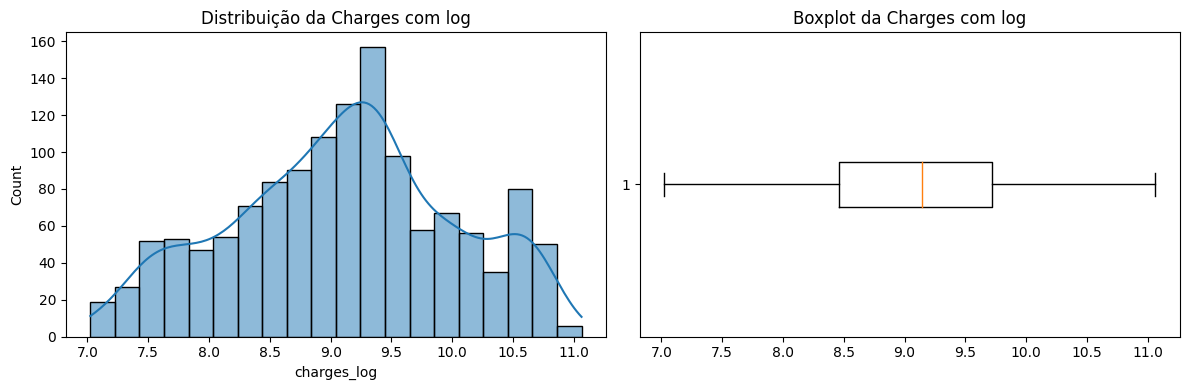

In [22]:
hist_box(df, 'charges', 'Distribuição da Charges sem log', 'Boxplot da Charges sem log')

hist_box(new_df, 'charges_log', 'Distribuição da Charges com log', 'Boxplot da Charges com log')

# Modelagem

A etapa de modelagem tem como objetivo construir um modelo estatístico capaz de estimar os custos médicos (```charges```) a partir de características demográficas e comportamentais dos indivíduos. Para isso, vou utilizar a Regressão Linear, uma técnica amplamente empregada em problemas de predição de variáveis contínuas e que oferece alta interpretabilidade dos resultados.

Criarei alguns modelos para analisar qual é o melhor e quais foram os pontos que melhoraram ou pioraram o modelo. Para isso, aplicarei a OLS.

## OLS

O **OLS (Ordinary Least Squares)**, ou **Mínimos Quadrados Ordinários**, é um método utilizado para estimar os parâmetros de um modelo de **regressão linear**. 

Seu objetivo é encontrar os coeficientes que **minimizam a soma dos quadrados dos resíduos**, isto é, das diferenças entre os valores observados e os valores previstos pelo modelo.

### 1. Coeficientes (`coef`)
Os coeficientes indicam **o efeito médio de cada variável explicativa** sobre a variável dependente, mantendo as demais constantes.

- Coeficiente positivo → relação direta  
- Coeficiente negativo → relação inversa  

Quando a variável dependente está em log, os coeficientes podem ser interpretados como **variações percentuais aproximadas**.

---

### 2. Intercepto (`const`)
Representa o valor esperado da variável dependente quando todas as variáveis explicativas são iguais a zero.

---

### 3. Erro padrão (`std err`)
Mede a **incerteza associada ao coeficiente estimado**.

- Erros padrão menores indicam estimativas mais precisas
- Erros elevados podem sinalizar colinearidade ou baixa variabilidade na variável

---

### 4. Estatística t (`t`)
A estatística t avalia se o coeficiente é significativamente diferente de zero.

Valores absolutos mais altos indicam maior evidência estatística.

---

### 5. Valor-p (`P>|t|`)
Indica a **significância estatística do coeficiente**.

- p < 0,05 → coeficiente estatisticamente significativo  
- p ≥ 0,05 → evidência insuficiente para afirmar que o coeficiente influencia o modelo  

Essa métrica ajuda a decidir quais variáveis contribuem efetivamente para a explicação da variável resposta.

---

### 6. Intervalo de Confiança (95%)
Mostra o intervalo dentro do qual o valor real do coeficiente provavelmente se encontra.

- Intervalos que **não cruzam zero** reforçam a significância do coeficiente
- Intervalos largos indicam maior incerteza

---

## Métricas de ajuste do modelo

### 7. R-squared (R²)
Indica a **proporção da variância da variável dependente explicada pelo modelo**.

- Varia entre 0 e 1
- Quanto maior, melhor o ajuste

---

### 8. R-squared Ajustado
Ajusta o R² considerando o número de variáveis no modelo.

---

### 9. Estatística F e Prob(F-statistic)
Avaliam a **significância global do modelo**.

- Testa se todos os coeficientes (exceto o intercepto) são iguais a zero
- p-value próximo de 0 indica que o modelo é estatisticamente relevante

## Primeiro modelo
- *log* na ```charges```;
- categorização na ```children```

In [23]:
# Criando o DF para comparar os resultados
df_resultados = pd.DataFrame(
    columns=['Modelo', 'R2', 'MAE', 'RMSE']
)

In [24]:
def treinar_regressao_linear(
    df,
    target,
    df_resultados,
    drop_cols=None,
    cat_cols=None,
    test_size=0.3,
    random_state=42,
    model_name='Regressão Linear'
):
    """
    Treina um modelo de Regressão Linear, avalia métricas e retorna o OLS.
    """

    # ===============================
    # Preparação dos dados
    # ===============================
    df_model = df.copy()

    if drop_cols:
        df_model = df_model.drop(columns=drop_cols)

    df_model = pd.get_dummies(
        df_model,
        columns=cat_cols,
        drop_first=True
    )

    X = df_model.drop(columns=[target]).astype(int)
    y = df_model[target]

    # ===============================
    # Treino / Teste
    # ===============================
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=test_size,
        random_state=random_state
    )

    # ===============================
    # Treinamento do modelo
    # ===============================
    model = LinearRegression()
    model.fit(X_train, y_train)

    # ===============================
    # Avaliação
    # ===============================
    y_pred = model.predict(X_test)

    r2 = round(r2_score(y_test, y_pred), 4)
    mae = round(mean_absolute_error(y_test, y_pred), 4)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)

    # ===============================
    # Adicionando resultados
    # ===============================
    nova_linha = pd.DataFrame({
        'Modelo': [model_name],
        'R2': [r2],
        'MAE': [mae],
        'RMSE': [rmse]
    })

    df_resultados = pd.concat(
        [df_resultados, nova_linha],
        ignore_index=True
    )

    # ===============================
    # OLS
    # ===============================
    X_ols = sm.add_constant(X)
    ols_model = sm.OLS(y, X_ols).fit()

    df_coeficientes = pd.DataFrame({
        'Variável': X.columns,
        'Coeficiente': model.coef_
    }).sort_values(by='Coeficiente', ascending=False)
    
    return model, df_resultados, ols_model

In [25]:
model_1, df_resultados, ols_1 = treinar_regressao_linear(
    df=new_df,
    target='charges_log',
    df_resultados=df_resultados,
    drop_cols=['bmi_cat', 'charges'],
    cat_cols=['sex', 'children', 'smoker'],
    model_name='Modelo 1 - Charge com log + bmi'
)

print('\nResumo OLS:')
print(ols_1.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     711.1
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:28:26   Log-Likelihood:                -824.62
No. Observations:                1338   AIC:                             1663.
Df Residuals:                    1331   BIC:                             1700.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0025      0.070 

C:\Users\Meu Computador\AppData\Local\Temp\ipykernel_28500\1214378865.py:66: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_resultados = pd.concat(


In [26]:
model_2, df_resultados, ols_2 = treinar_regressao_linear(
    df=new_df,
    target='charges',
    df_resultados=df_resultados,
    drop_cols=['charges_log', 'bmi'],
    cat_cols=['sex', 'children', 'smoker'],
    model_name='Modelo 2 - Charge sem log'
)

print('\nResumo OLS:')
print(ols_2.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     663.0
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:28:26   Log-Likelihood:                -13552.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -9733.0116    801.869 

In [27]:
model_3, df_resultados, ols_3 = treinar_regressao_linear(
    df=new_df,
    target='charges_log',
    df_resultados=df_resultados,
    drop_cols=['bmi', 'charges'],
    cat_cols=['sex', 'children', 'smoker'],
    model_name='Modelo 3 - Charge com log + bmi_cat'
)

print('\nResumo OLS:')
print(ols_3.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     712.0
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:28:26   Log-Likelihood:                -823.95
No. Observations:                1338   AIC:                             1662.
Df Residuals:                    1331   BIC:                             1698.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0716      0.059 

In [28]:
model_4, df_resultados, ols_4 = treinar_regressao_linear(
    df=new_df,
    target='charges_log',
    df_resultados=df_resultados,
    drop_cols=['bmi', 'charges', 'children'],
    cat_cols=['sex', 'smoker'],
    model_name='Modelo 4 - Charge_log sem children'
)

print('\nResumo OLS:')
print(ols_4.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     979.9
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:28:26   Log-Likelihood:                -868.17
No. Observations:                1338   AIC:                             1746.
Df Residuals:                    1333   BIC:                             1772.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1814      0.060    119

In [29]:
model_5, df_resultados, ols_5 = treinar_regressao_linear(
    df=new_df,
    target='charges_log',
    df_resultados=df_resultados,
    drop_cols=['bmi', 'charges', 'sex', 'children'],
    cat_cols=['smoker'],
    model_name='Modelo 5 - Charge_log sem sex e children'
)

print('\nResumo OLS:')
print(ols_5.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     1297.
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:28:26   Log-Likelihood:                -872.06
No. Observations:                1338   AIC:                             1752.
Df Residuals:                    1334   BIC:                             1773.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1512      0.059    121

In [30]:
model_6, df_resultados, ols_6 = treinar_regressao_linear(
    df=new_df,
    target='charges_log',
    df_resultados=df_resultados,
    drop_cols=['bmi', 'charges', 'sex'],
    cat_cols=['smoker', 'children'],
    model_name='Modelo 6 - Charge_log sem sex'
)

print('\nResumo OLS:')
print(ols_6.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     847.3
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:28:26   Log-Likelihood:                -828.58
No. Observations:                1338   AIC:                             1669.
Df Residuals:                    1332   BIC:                             1700.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0403      0.059 

In [31]:
model_7, df_resultados, ols_7 = treinar_regressao_linear(
    df=new_df,
    target='charges_log',
    df_resultados=df_resultados,
    drop_cols=['bmi', 'charges', 'smoker'],
    cat_cols=['sex', 'children'],
    model_name='Modelo 7 - Charge_log sem smoker'
)

print('\nResumo OLS:')
print(ols_7.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     115.1
Date:                Tue, 30 Dec 2025   Prob (F-statistic):          2.94e-101
Time:                        10:28:26   Log-Likelihood:                -1545.3
No. Observations:                1338   AIC:                             3103.
Df Residuals:                    1332   BIC:                             3134.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.3963      0.101 

In [32]:
model_8, df_resultados, ols_8 = treinar_regressao_linear(
    df=new_df,
    target='charges_log',
    df_resultados=df_resultados,
    drop_cols=['bmi', 'charges', 'bmi_cat'],
    cat_cols=['smoker', 'children', 'sex'],
    model_name='Modelo 8 - Charge_log sem bmi'
)

print('\nResumo OLS:')
print(ols_8.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     830.0
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:28:26   Log-Likelihood:                -839.09
No. Observations:                1338   AIC:                             1690.
Df Residuals:                    1332   BIC:                             1721.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.3073      0.042 

In [33]:
model_9, df_resultados, ols_9 = treinar_regressao_linear(
    df=new_df,
    target='charges_log',
    df_resultados=df_resultados,
    drop_cols=['bmi', 'charges', 'bmi_cat', 'age'],
    cat_cols=['smoker', 'children', 'sex'],
    model_name='Modelo 9 - Charge_log sem age'
)

print('\nResumo OLS:')
print(ols_9.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     295.0
Date:                Tue, 30 Dec 2025   Prob (F-statistic):          8.93e-182
Time:                        10:28:26   Log-Likelihood:                -1361.4
No. Observations:                1338   AIC:                             2733.
Df Residuals:                    1333   BIC:                             2759.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.6745      0.034 

In [34]:
df_resultados

,Modelo,R2,MAE,RMSE
0,Modelo 1 - Charge com log + bmi,0.7782,0.2758,0.4309
1,Modelo 2 - Charge sem log,0.7626,4344.0350,5900.3709
2,Modelo 3 - Charge com log + bmi_cat,0.7767,0.2789,0.4323
3,Modelo 4 - Charge_log sem children,0.7573,0.2929,0.4508
4,Modelo 5 - Charge_log sem sex e children,0.7556,0.2942,0.4523
5,Modelo 6 - Charge_log sem sex,0.7747,0.2803,0.4342
6,Modelo 7 - Charge_log sem smoker,0.3262,0.6220,0.7510
7,Modelo 8 - Charge_log sem bmi,0.7726,0.2699,0.4363
8,Modelo 9 - Charge_log sem age,0.4749,0.5519,0.6630


# Avaliação dos modelos de Regressão Linear

A comparação entre os diferentes modelos de regressão linear permitiu extrair insights estatísticos e de negócio relevantes sobre os fatores que influenciam o valor dos gastos médicos (`charges`).

---

## Importância da transformação logarítmica

- Os modelos que utilizam o **logaritmo do target (`charges_log`)** apresentam:
  - Maior estabilidade,
  - Erros significativamente menores (MAE e RMSE),
  - Melhor capacidade preditiva.

- O modelo sem transformação (Modelo 2) possui MAE e RMSE muito elevados, indicando:
  - Assimetria nos dados,
  - Presença de valores extremos,
  - Violação de premissas da regressão linear.

**Insight:** a transformação logarítmica é essencial para modelar adequadamente os gastos médicos.

---

## Impacto do hábito de fumar

- A exclusão da variável `smoker` (Modelo 7) provoca uma **queda abrupta no R²** (de ~0.77 para 0.32).
- O aumento expressivo dos erros confirma que:
  - O hábito de fumar é o **principal** fator explicativo dos custos médicos.

**Insight de negócio:** indivíduos fumantes geram custos médicos substancialmente mais elevados, sendo um fator crítico para precificação e gestão de risco.

---

## Papel do BMI (Índice de Massa Corporal)

- A remoção do `bmi` (Modelo 8) reduz o desempenho do modelo.
- A categorização do BMI (`bmi_cat`) não apresenta ganhos relevantes em relação ao valor contínuo.

**Insight:** o BMI influencia os custos médicos, mas sua forma contínua preserva melhor a informação do que categorias discretas.

---

## Influência do número de filhos

- A exclusão da variável `children` (Modelo 4) reduz o R² e aumenta os erros.
- O impacto é moderado, mas consistente.

**Insight:** o número de dependentes contribui para o aumento dos gastos médicos, embora com efeito menor que `smoker`, `age` e `bmi`.

---

## Variável age

A exclusão da variável ```age``` também provocou uma queda no **R²** e um aumento expressivo dos erros, tal como aconteceu com a remoção do `smoker`.

**Insight de negócio**: A variável idade mostrou-se altamente relevante para o modelo. Do ponto de vista do plano de negócio, esse resultado é plausível, uma vez que, conforme a idade aumenta, o custo do plano tende a ser maior.

---

## Relevância da variável sexo

- A retirada da variável `sex` (Modelo 6) praticamente não altera o desempenho do modelo.
- Indica baixa contribuição explicativa para o target.

**Insight:** o sexo do indivíduo tem influência limitada sobre os custos médicos quando controladas as demais variáveis.

---

## Modelo com melhor desempenho

- O **Modelo 1 (charges_log + bmi)** apresentou:
  - Maior R²,
  - Menores erros,
  - Boa interpretabilidade.

**Insight final:** este modelo representa o melhor equilíbrio entre desempenho preditivo, simplicidade e aderência às premissas da regressão linear.

---

## Considerações

- Variáveis **comportamentais** (como fumar) possuem impacto mais relevante do que variáveis **demográficas** (sexo, idade).
- Os ganhos na aplicação do *log* na *target* se mostrou estatisticamente compravada.

---

# Melhorando o modelo

## Engenharia de Features

Para aprimorar o desempenho do modelo, irei aplicar a `engenharia de features`, com o objetivo de criar variáveis condicionais ao tabagismo. A ideia é capturar relações mais complexas entre as variáveis explicativas e a variável alvo, contribuindo para a melhoria das métricas de desempenho e da capacidade preditiva do modelo.

Essa combinação, em teoria, capturam o *efeito combinado* entre fatores físicos/demográficos e o hábito de fumar.

## Avaliação

| Métrica  | Valor      |
| -------- | ---------- |
| **R²**   | **0.8237** |
| **MAE**  | **0.2110** |
| **RMSE** | **0.3842** |

- o modelo explica **82%** da variabilidade dos custos, indicando forte capacidade explicativa para o modelo.
- A diminuição do `MAE`traz menos erros relativos e maior estabilidade nas previsões.
- A penalização de grandes erros também diminuiu, com o `RMSE`= 0.3842

In [35]:
df_teste = new_df.copy()  # Cópia de segurança

# Criando a variável BMI que fumam
df_teste['bmi_smoker'] = df_teste['bmi'] * (df_teste['smoker'] == 'yes').astype(int)

# Criando a variável de fumantes para idade
df_teste['age_smoker'] = df_teste['age'] * (df_teste['smoker'] == 'yes').astype(int)

# Criando a varíavel de fumantes para cada sexo, sendo 0 = female, 1 = male
df_teste['sex_male'] = (df_teste['sex'] == 'male').astype(int)
df_teste['sex_male_smoker'] = df_teste['sex_male'] * (df_teste['smoker'] == 'yes').astype(int)

df_teste.head()

,age,sex,bmi,children,smoker,charges,bmi_cat,charges_log,bmi_smoker,age_smoker,sex_male,sex_male_smoker
0,19,female,27.900,0,yes,16884.92400,3,9.734236,27.9,19,0,0
1,18,male,33.770,1-2,no,1725.55230,4,7.453882,0.0,0,1,0
2,28,male,33.000,3+,no,4449.46200,4,8.400763,0.0,0,1,0
3,33,male,22.705,0,no,21984.47061,2,9.998137,0.0,0,1,0
4,32,male,28.880,0,no,3866.85520,3,8.260455,0.0,0,1,0


In [36]:
model_eng_cat_1, df_resultados, ols_eng_cat_1 = treinar_regressao_linear(
    df=df_teste,
    target='charges_log',
    df_resultados=df_resultados,
    drop_cols=['bmi_cat', 'charges','sex', 'sex_male'],
    cat_cols=['children', 'smoker'],
    model_name='Modelo Eng_cat - age, bmi, sex'
)

print('\nResumo OLS:')
print(ols_eng_cat_1.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     740.7
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:28:26   Log-Likelihood:                -650.14
No. Observations:                1338   AIC:                             1318.
Df Residuals:                    1329   BIC:                             1365.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.0416   

## OLS

Ao analisar os parâmetros do modelo, observei que algumas variáveis apresentam o valor de `p>|t|` acima do nível de significância adotado *(0,05)*. Isso indica que, do ponto de vista estatístico, tais variáveis não demonstram contribuição relevante para a explicação da variável resposta dentro deste modelo.

Por isso, criarei outro modelo excluindo essas variáveis:
- `bmi`
- `sex_male_smoker`

In [37]:
model_eng_cat_2, df_resultados, ols_eng_cat_2 = treinar_regressao_linear(
    df=df_teste,
    target='charges_log',
    df_resultados=df_resultados,
    drop_cols=['bmi_cat', 'charges','sex', 'sex_male', 'bmi', 'sex_male_smoker'],
    cat_cols=['children', 'smoker'],
    model_name='Modelo Eng_cat_2 - sem bmi e sex_male_smoker'
)

print('\nResumo OLS:')
print(ols_eng_cat_2.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     988.7
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:28:26   Log-Likelihood:                -650.36
No. Observations:                1338   AIC:                             1315.
Df Residuals:                    1331   BIC:                             1351.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0142      0.038 

In [38]:
model_eng_cat_3, df_resultados, ols_eng_cat_3 = treinar_regressao_linear(
    df=df_teste,
    target='charges_log',
    df_resultados=df_resultados,
    drop_cols=['bmi_cat', 'charges', 'sex_male', 'bmi', 'sex_male_smoker'],
    cat_cols=['children', 'smoker', 'sex'],
    model_name='Modelo Eng_cat_3 - sem bmi e sex_male_smoker, com sex'
)

print('\nResumo OLS:')
print(ols_eng_cat_3.summary())


Resumo OLS:
                            OLS Regression Results                            
Dep. Variable:            charges_log   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     858.8
Date:                Tue, 30 Dec 2025   Prob (F-statistic):               0.00
Time:                        10:28:26   Log-Likelihood:                -642.68
No. Observations:                1338   AIC:                             1301.
Df Residuals:                    1330   BIC:                             1343.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            7.0573      0.039 

## Conclusão

### Modelo Eng_cat_3 - sem bmi e sex_male_smoker, com sex

A `engenharia de feature` melhorou significativamente o desempenho do modelo, comparando o modelo base (Modelo 1) com os modelos que incorporam variáveis de interação.

- **R²** aumentou de **0,778** para **0,8268**
- **MAE** reduziu de **0,2758** para **0,2102**
- **RMSE** reduziu de **0,4309** para **0,3808**

A interpretação do **OLS** indica que o modelo explica certa de **82%**, tem um `F_statistic`altamente significativo, ou seja, o conjunto de variáveis é estatisticamente relevante; e o `Dubin-Watson` diz que não há evidência de autocorrelação nos resíduos.

| Variável         | Coeficiente | p-valor | Interpretação                                                                                                                                                                                                                               |
| ---------------- | ----------- | ------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **age**          | **0.0416**  | < 0.001 | Cada aumento de **1 ano na idade** eleva o custo esperado do plano em aproximadamente **4,2%**, mantendo as demais variáveis constantes. Confirma a idade como um fator estrutural de precificação.                                         |
| **smoker_yes**   | **1.3621**  | < 0.001 | Ser fumante aumenta o custo esperado do plano em cerca de **290%**, consolidando-se como o fator de maior impacto no modelo.                                                                                                 |
| **bmi_smoker**   | **0.0490**  | < 0.001 | Para fumantes, cada **1 ponto adicional de BMI** aumenta o custo esperado do plano em aproximadamente **4,9%**, evidenciando um efeito de interação relevante entre obesidade e tabagismo.                                                  |
| **age_smoker**   | **-0.0334** | < 0.001 | Para fumantes, o efeito marginal da idade é reduzido em cerca de **3,3% por ano**, indicando que parte do risco associado à idade já está absorvida pelo status de fumante.                                                                 |
| **children_1-2** | **0.2110**  | < 0.001 | Ter **1 a 2 filhos** aumenta o custo esperado do plano em aproximadamente **23,5%**, refletindo maior utilização potencial do plano.                                                                                         |
| **children_3+**  | **0.3107**  | < 0.001 | Ter **3 ou mais filhos** eleva o custo esperado em cerca de **36,5%**, indicando crescimento não linear do risco conforme o número de dependentes.                                                                                          |
| **sex_male**     | **-0.0845** | < 0.001 | Indivíduos do sexo masculino apresentam um custo esperado cerca de **8,1% menor** em relação ao sexo feminino, mantendo as demais variáveis constantes. O efeito é estatisticamente significativo, porém secundário em termos estratégicos. |

### Observações

- `BMI` isolado deixou de ser relevante estatisticamente, mas ganhou importância quando transformado em interação com `smoker`. Isso mostra que o valor do BMI não atua sozinho, mas potencializa riscos quando associado ao tabagismo.
- Como interpretei o valor do `coeficiente` de 1,36 do smoker_yes? A variável target é **log(charges)**, logo, a interpretação deve ser *multiplicativa*, sendo:

$( e^{1.3621} - 1) 100$

$( 3.905 - 1) 100$

$290.5\%$

- Para a variável `sex_male`, o grupo de referência é o *feminino*. Assim, coeficientes negativos indicam que indivíduos do sexo masculino apresentam um custo menor em relação às mulheres, enquanto coeficientes positivos indicariam um custo maior para os homens.

In [39]:
df_resultados

,Modelo,R2,MAE,RMSE
0,Modelo 1 - Charge com log + bmi,0.7782,0.2758,0.4309
1,Modelo 2 - Charge sem log,0.7626,4344.0350,5900.3709
2,Modelo 3 - Charge com log + bmi_cat,0.7767,0.2789,0.4323
3,Modelo 4 - Charge_log sem children,0.7573,0.2929,0.4508
4,Modelo 5 - Charge_log sem sex e children,0.7556,0.2942,0.4523
5,Modelo 6 - Charge_log sem sex,0.7747,0.2803,0.4342
6,Modelo 7 - Charge_log sem smoker,0.3262,0.6220,0.7510
7,Modelo 8 - Charge_log sem bmi,0.7726,0.2699,0.4363
8,Modelo 9 - Charge_log sem age,0.4749,0.5519,0.6630
9,"Modelo Eng_cat - age, bmi, sex",0.8237,0.2110,0.3842


# Avaliação dos resíduos

Consiste na diferença entre **valores reais** e **previstos**. Quando a variância dos resíduos não é constante, ocorre a `heterocedasticidade`, comprometendo a confiabilidade da inferência estatística.

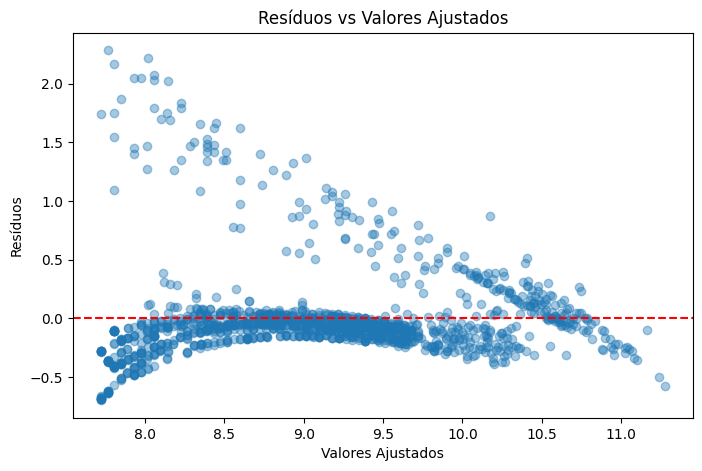

In [40]:
residuos = ols_eng_cat_3.resid
valores_ajustados = ols_eng_cat_3.fittedvalues

plt.figure(figsize=(8,5))
plt.scatter(valores_ajustados, residuos, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Resíduos vs Valores Ajustados')
plt.show()

## Conclusão do gráfico

A análise gráfica dos resíduos em relação aos valores ajustados indica a presença de heterocedasticidade, caracterizada por maior variância dos erros para faixas específicas de custo estimado. Esse comportamento é comum em modelos de precificação e custos médicos, nos quais indivíduos de maior risco apresentam maior volatilidade nos gastos.

# Utilizando na base de teste

In [41]:
# Preparando o conjunto de teste
teste_modelo = df_teste.copy()

# Excluindo as variáveis que não serão usadas
teste_modelo = teste_modelo.drop(
    columns=['charges', 'sex', 'bmi', 'bmi_cat', 'sex_male_smoker']
)

# Criando dummies
teste_modelo = pd.get_dummies(
    teste_modelo,
    columns=['children', 'smoker'],
    drop_first=True
)

# Converter dummies booleanas para int
for col in teste_modelo.columns:
    if teste_modelo[col].dtype == 'bool':
        teste_modelo[col] = teste_modelo[col].astype(int)


# Alinhando colunas com o modelo OLS
colunas_modelo = ols_eng_cat_3.model.exog_names

# Remove a constante temporariamente
colunas_sem_const = [c for c in colunas_modelo if c != 'const']

# Garantir todas as colunas
for col in colunas_sem_const:
    if col not in teste_modelo.columns:
        teste_modelo[col] = 0

# Reordenar
X_test = teste_modelo[colunas_sem_const]

# Adicionar constante
X_test = sm.add_constant(X_test)


# Previsão
y_pred_log = ols_eng_cat_3.predict(X_test)
y_test_log = teste_modelo['charges_log']


# Métricas
r2 = r2_score(y_test_log, y_pred_log)
mae = mean_absolute_error(y_test_log, y_pred_log)
rmse = np.sqrt(mean_squared_error(y_test_log, y_pred_log))

print(f'R2 Teste (log): {r2:.4f}')
print(f'MAE Teste (log): {mae:.4f}')
print(f'RMSE Teste (log): {rmse:.4f}')

R2 Teste (log): 0.8187
MAE Teste (log): 0.2205
RMSE Teste (log): 0.3913


# Conclusões do modelo de teste

No conjunto de teste, o modelo apresentou `R²` de 0.8187, explicando aproximadamente 82% dos custos médicos. As métricas `MAE` e `RMSE` indicam erro médio controlado e comportamento consiste. Embora a análise dos resíduos evidencie *heterocedasticidade*, isso não compromete a capacidade preditiva do modelo.

## Insights para o negócio

A interpretação dos coeficientes na escala logarítmica permite traduzir diretamente o modelo em variações percentuais de preço, facilitando sua aplicação em estratégias de pricing baseadas em risco.

| Variável         | Coef.       | Impacto no pricing                    |
| ---------------- | ----------- | ------------------------------------- |
| **age**          | 0.0416      | **+4.25% por ano**                    |
| **bmi_smoker**   | 0.0490      | **+5.03% por ponto de BMI (fumante)** |
| **age_smoker**   | -0.0334     | **−3.28% por ano (fumante)**          |
| **children_1-2** | 0.2110      | **+23.5%**                            |
| **children_3+**  | 0.3107      | **+36.5%**                            |
| **smoker_yes**   | 1.3621      | **+290.5%**                           |
| **sex_male**     | -0.0845     | **−8.1%**                             |

### `smoker_yes`
É o eixo central da predição, aumenta em quase 300% o custo.

### `age`(não fumante)
Aumento de 4,25% por ano.

### `bmi`(fumantes)
A interação de *bmi* com *smoker* foi determinante para esta variável, visto que ela só é relevante quando o cliente é fumante. Aumento de 5%.

### `age_smoker` (fumante)
Enquanto a idade eleva os custos em aproximadamente 4,2% ao ano entre **não fumantes**, esse aumento cai para cerca de *0,8%* ao ano entre fumantes, evidenciando que o risco associado à idade é condicionado ao tabagismo.
O valor de 0,82% vem da soma dos coeficientes $ 0.0416 + (-0.0334) $. Isso acontece porque o `age_smoker` é um ajuste condicional, não o efeito total.

### `filhos`
Quanto mais filhos, maior o custo. Indivíduos sem filhos constituem a categoria de referência do modelo e não apresentam acréscimo no custo estimado. Em comparação, pessoas com 1 ou 2 filhos possuem um custo aproximadamente *23,5%* maior, enquanto aquelas com três ou mais filhos apresentam um aumento médio de cerca de *36,4%*.

### `sex_male`
Clientes **masculinos** custam aproximadamente 8% a menos que o **feminino**.

In [42]:
# Extraindo coeficientes do modelo OLS
coeficientes = ols_eng_cat_3.params

# Separando intercepto
intercepto = coeficientes['const']

# Removendo o intercepto para análise das variáveis
coef_variaveis = coeficientes.drop('const')

print(f"Intercepto (baseline log-price): {intercepto:.4f}")
print("\nCoeficientes do modelo:")
print(coef_variaveis)

Intercepto (baseline log-price): 7.0573

Coeficientes do modelo:
age             0.041577
bmi_smoker      0.049023
age_smoker     -0.033378
children_1-2    0.211013
children_3+     0.310679
smoker_yes      1.362051
sex_male       -0.084536
dtype: float64


# Aprendizado

Ao longo deste projeto, obtive aprendizados técnicos e pessoais relevantes. Inicialmente, ficou claro que modelar a target charges sem qualquer tipo de tratamento resultava em métricas inconsistentes e padrões inadequados nos resíduos. A partir disso, pesquisei e testei alternativas, chegando à **transformação logarítmica** como uma solução eficaz para estabilizar a variância e melhorar o desempenho do modelo.

A `engenharia de features` teve papel central no projeto. As variáveis de interação entre **tabagismo**, **idade** e **BMI** mostraram-se determinantes para capturar efeitos que não seriam explicados por relações lineares simples. O entendimento sobre a exclusão de variáveis redundantes ou estatisticamente irrelevantes contribuiu para um modelo mais interpretável e eficiente.

Outro aprendizado técnico importante foi compreender que a **heterocedasticidade**, embora presente, *não invalida o modelo* quando as métricas de desempenho são consistentes e os coeficientes permanecem estatisticamente significativos.

Durante a validação no conjunto de teste, enfrentei dificuldades práticas, como a **interpretação de métricas negativas**, que serviram como sinal de inconsistências no pipeline de preparação dos dados. Esses episódios foram fundamentais para reforçar boas práticas de validação e consistência entre treino e teste.

Além da parte técnica, procurei conduzir o projeto com uma visão orientada ao negócio, questionando constantemente se os resultados faziam sentido no mundo real e se os efeitos estimados eram plausíveis do ponto de vista econômico e comportamental. Erros fizeram parte de todo o processo, desde a criação de variáveis dummy, tratamento de outliers, até problemas de interpretação de métricas e gráficos. Lidei com esses desafios de forma madura e estruturada, utilizando cada falha como uma oportunidade de aprendizado e refinamento do modelo.

Por fim, consolidei a percepção de que *Ciência de Dados* só gera valor quando se transforma em **decisão**. Por isso, fui além do ajuste do modelo e da análise de métricas, aplicando os resultados em um contexto realista de pricing, avaliando o impacto financeiro e estratégico das variáveis no negócio.